<a href="https://colab.research.google.com/github/ebel-frank/ai_ml_projects/blob/main/DSEATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first let us import libraries that we are going to use in our Analysis
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
!pwd

/content


In [ ]:
data = 'dseats_2024_training_dataset.csv'

df = pd.read_csv(data)

In [ ]:
df.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE  \
0  07/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
1  08/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
2  09/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
3  10/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
4  11/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   

  WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0     001-F-1 C  production        OP                  0.00000   
1     001-F-1 C  production        OP                  0.00000   
2     001-F-1 C  production        OP                  0.00000   
3     001-F-1 C  production        OP                  0.00000   
4     001-F-1 C  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                  0.00000   
1                      273.15000                  0.00000   
2                      273.15000                  0.00000   
3                      273.15000                  0.00000   
4                      370.02589               4020.53477   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0        0.00000     0.00000   
1                     0.0        0.00000     0.00000   
2                     0.0        0.00000     0.00000   
3                     0.0        0.00000     0.00000   
4                     0.0      479.91926    33.07195   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  
0                       0.0                   0.0                         0.0  
1                       0.0                   0.0                         0.0  
2                       0.0                   0.0                         0.0  
3                       0.0                   0.0                         0.0  
4                       0.0                   0.0                         0.0

In [ ]:
df.shape

(6925, 16)

In [ ]:
df.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

In [ ]:
# Summary statistics in numerical variables

round(df.describe(),2)

N_WELL_BORE_CODE  Downhole Pressure (PSI)  \
count           6925.00                  6925.00   
mean             107.30                  2587.48   
std                0.98                  1588.47   
min              105.00                     0.00   
25%              107.00                     0.00   
50%              107.00                  3378.40   
75%              108.00                  3664.91   
max              109.00                  4606.67   

       Downhole Temperature (Kelvin)  Average Tubing Pressure  \
count                        6925.00                  6925.00   
mean                          349.67                  2161.99   
std                            46.24                  1053.88   
min                           273.15                     0.00   
25%                           273.15                   896.61   
50%                           376.91                  2472.03   
75%                           379.50                  2907.05   
max                           381.65                  4592.61   

       Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
count                 6925.00        6925.00     6919.00   
mean                   180.37         716.58       21.86   
std                    139.77         347.86       22.30   
min                      0.00           0.00        0.00   
25%                      0.00         476.54        4.63   
50%                    213.09         619.65       14.30   
75%                    300.36         903.89       31.53   
max                    435.29        1991.01      125.72   

       Oil Production (stb/day)  Gas Volume (scf/day)  \
count                   6925.00               6925.00   
mean                    8494.77            6978689.58   
std                     8927.60            7100874.85   
min                        0.00                  0.00   
25%                     1686.60            1434288.07   
50%                     5479.47            4770461.42   
75%                    11730.47            9892229.84   
max                    37122.57           30044942.66   

       Water Production (stb/day)  
count                     6925.00  
mean                     11480.56  
std                      11484.48  
min                      -2879.81  
25%                         80.32  
50%                       5529.41  
75%                      22261.51  
max                      50444.16

In [ ]:
# Check for missing values in variables
df.isnull().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

In [ ]:
# Remove missing values
df = df.dropna()

In [ ]:
# Convert PRODUCTION DATE to datetime
df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], format='%d/%m/%Y %H:%M')

In [ ]:
# Extract year and month from PRODUCTION DATE
df['Year'] = df['PRODUCTION DATE'].dt.year
df['Month'] = df['PRODUCTION DATE'].dt.month

In [ ]:
# Drop columns that won't be used in the model
df.drop(['PRODUCTION DATE', 'Field Name', 'WellBore Name', 'WELL_BORE_CODE', 'FLOW_KIND', 'WELL_TYPE'], axis=1, inplace=True)


In [ ]:
df.head()

N_WELL_BORE_CODE  Downhole Pressure (PSI)  Downhole Temperature (Kelvin)  \
0               105                  0.00000                      273.15000   
1               105                  0.00000                      273.15000   
2               105                  0.00000                      273.15000   
3               105                  0.00000                      273.15000   
4               105               4500.45403                      370.02589   

   Average Tubing Pressure  Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                  0.00000                     0.0        0.00000     0.00000   
1                  0.00000                     0.0        0.00000     0.00000   
2                  0.00000                     0.0        0.00000     0.00000   
3                  0.00000                     0.0        0.00000     0.00000   
4               4020.53477                     0.0      479.91926    33.07195   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  \
0                       0.0                   0.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                       0.0                   0.0                         0.0   

   Year  Month  
0  2014      4  
1  2014      4  
2  2014      4  
3  2014      4  
4  2014      4

In [ ]:
df['WELL_BORE_CODE'].value_counts()   # This is the only nominal data we have

WELL_BORE_CODE
DSEAT-001-F-12 H    2611
DSEAT-001-F-14 H    2611
DSEAT-001-F-11 H     714
DSEAT-001-F-15 D     533
DSEAT-001-F-1 C      450
Name: count, dtype: int64

In [ ]:
df['N_WELL_BORE_CODE'].value_counts()

N_WELL_BORE_CODE
107    2611
108    2611
106     714
109     533
105     450
Name: count, dtype: int64

In [ ]:
import plotly.express as px
cut_counts = df['WELL_BORE_CODE'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values)
fig.show()

I am done with cleaning. Let's visualize our datasets

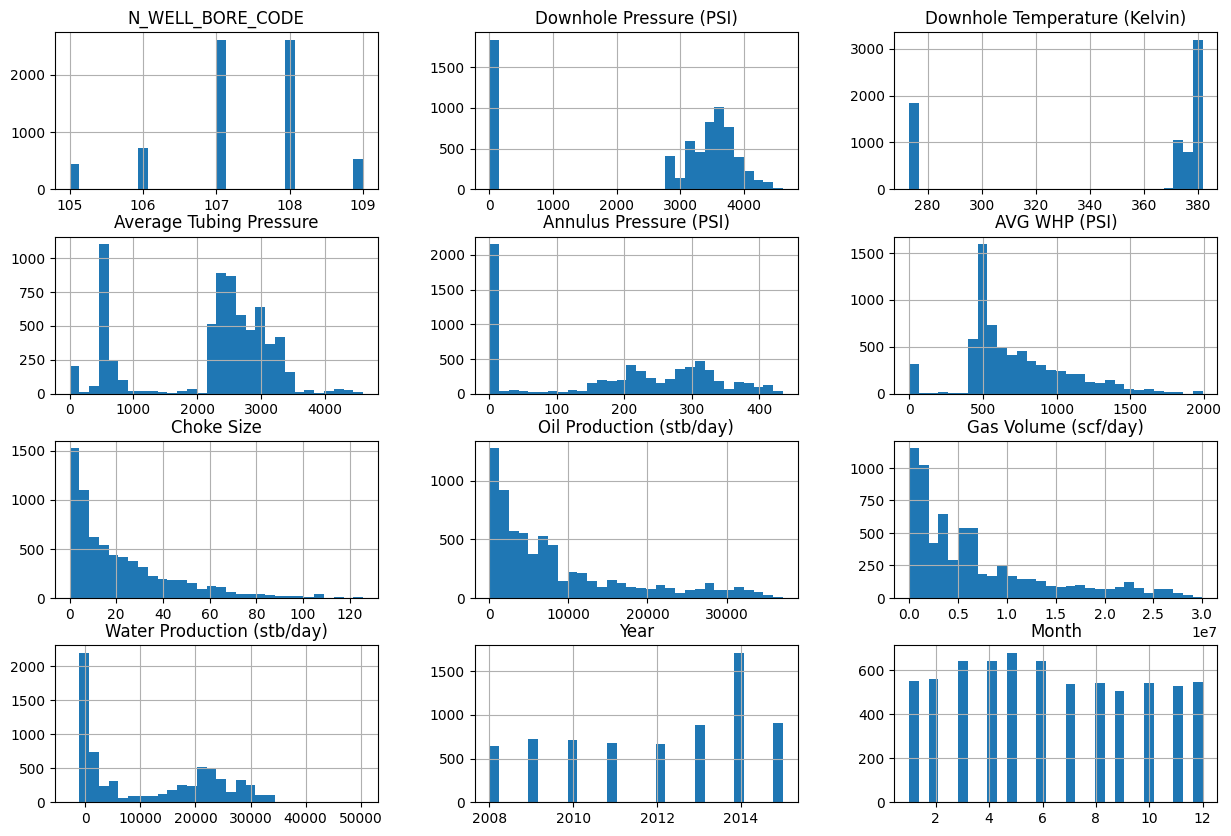

In [ ]:
# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

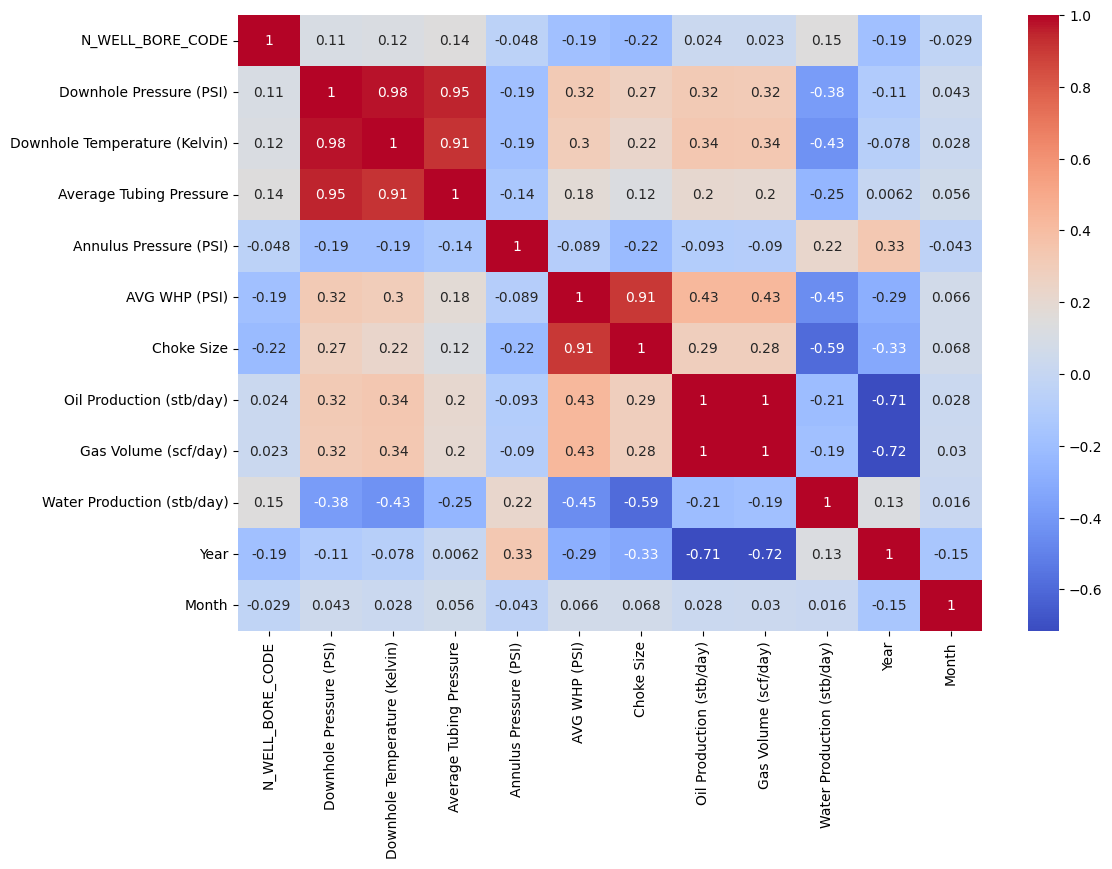

In [ ]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

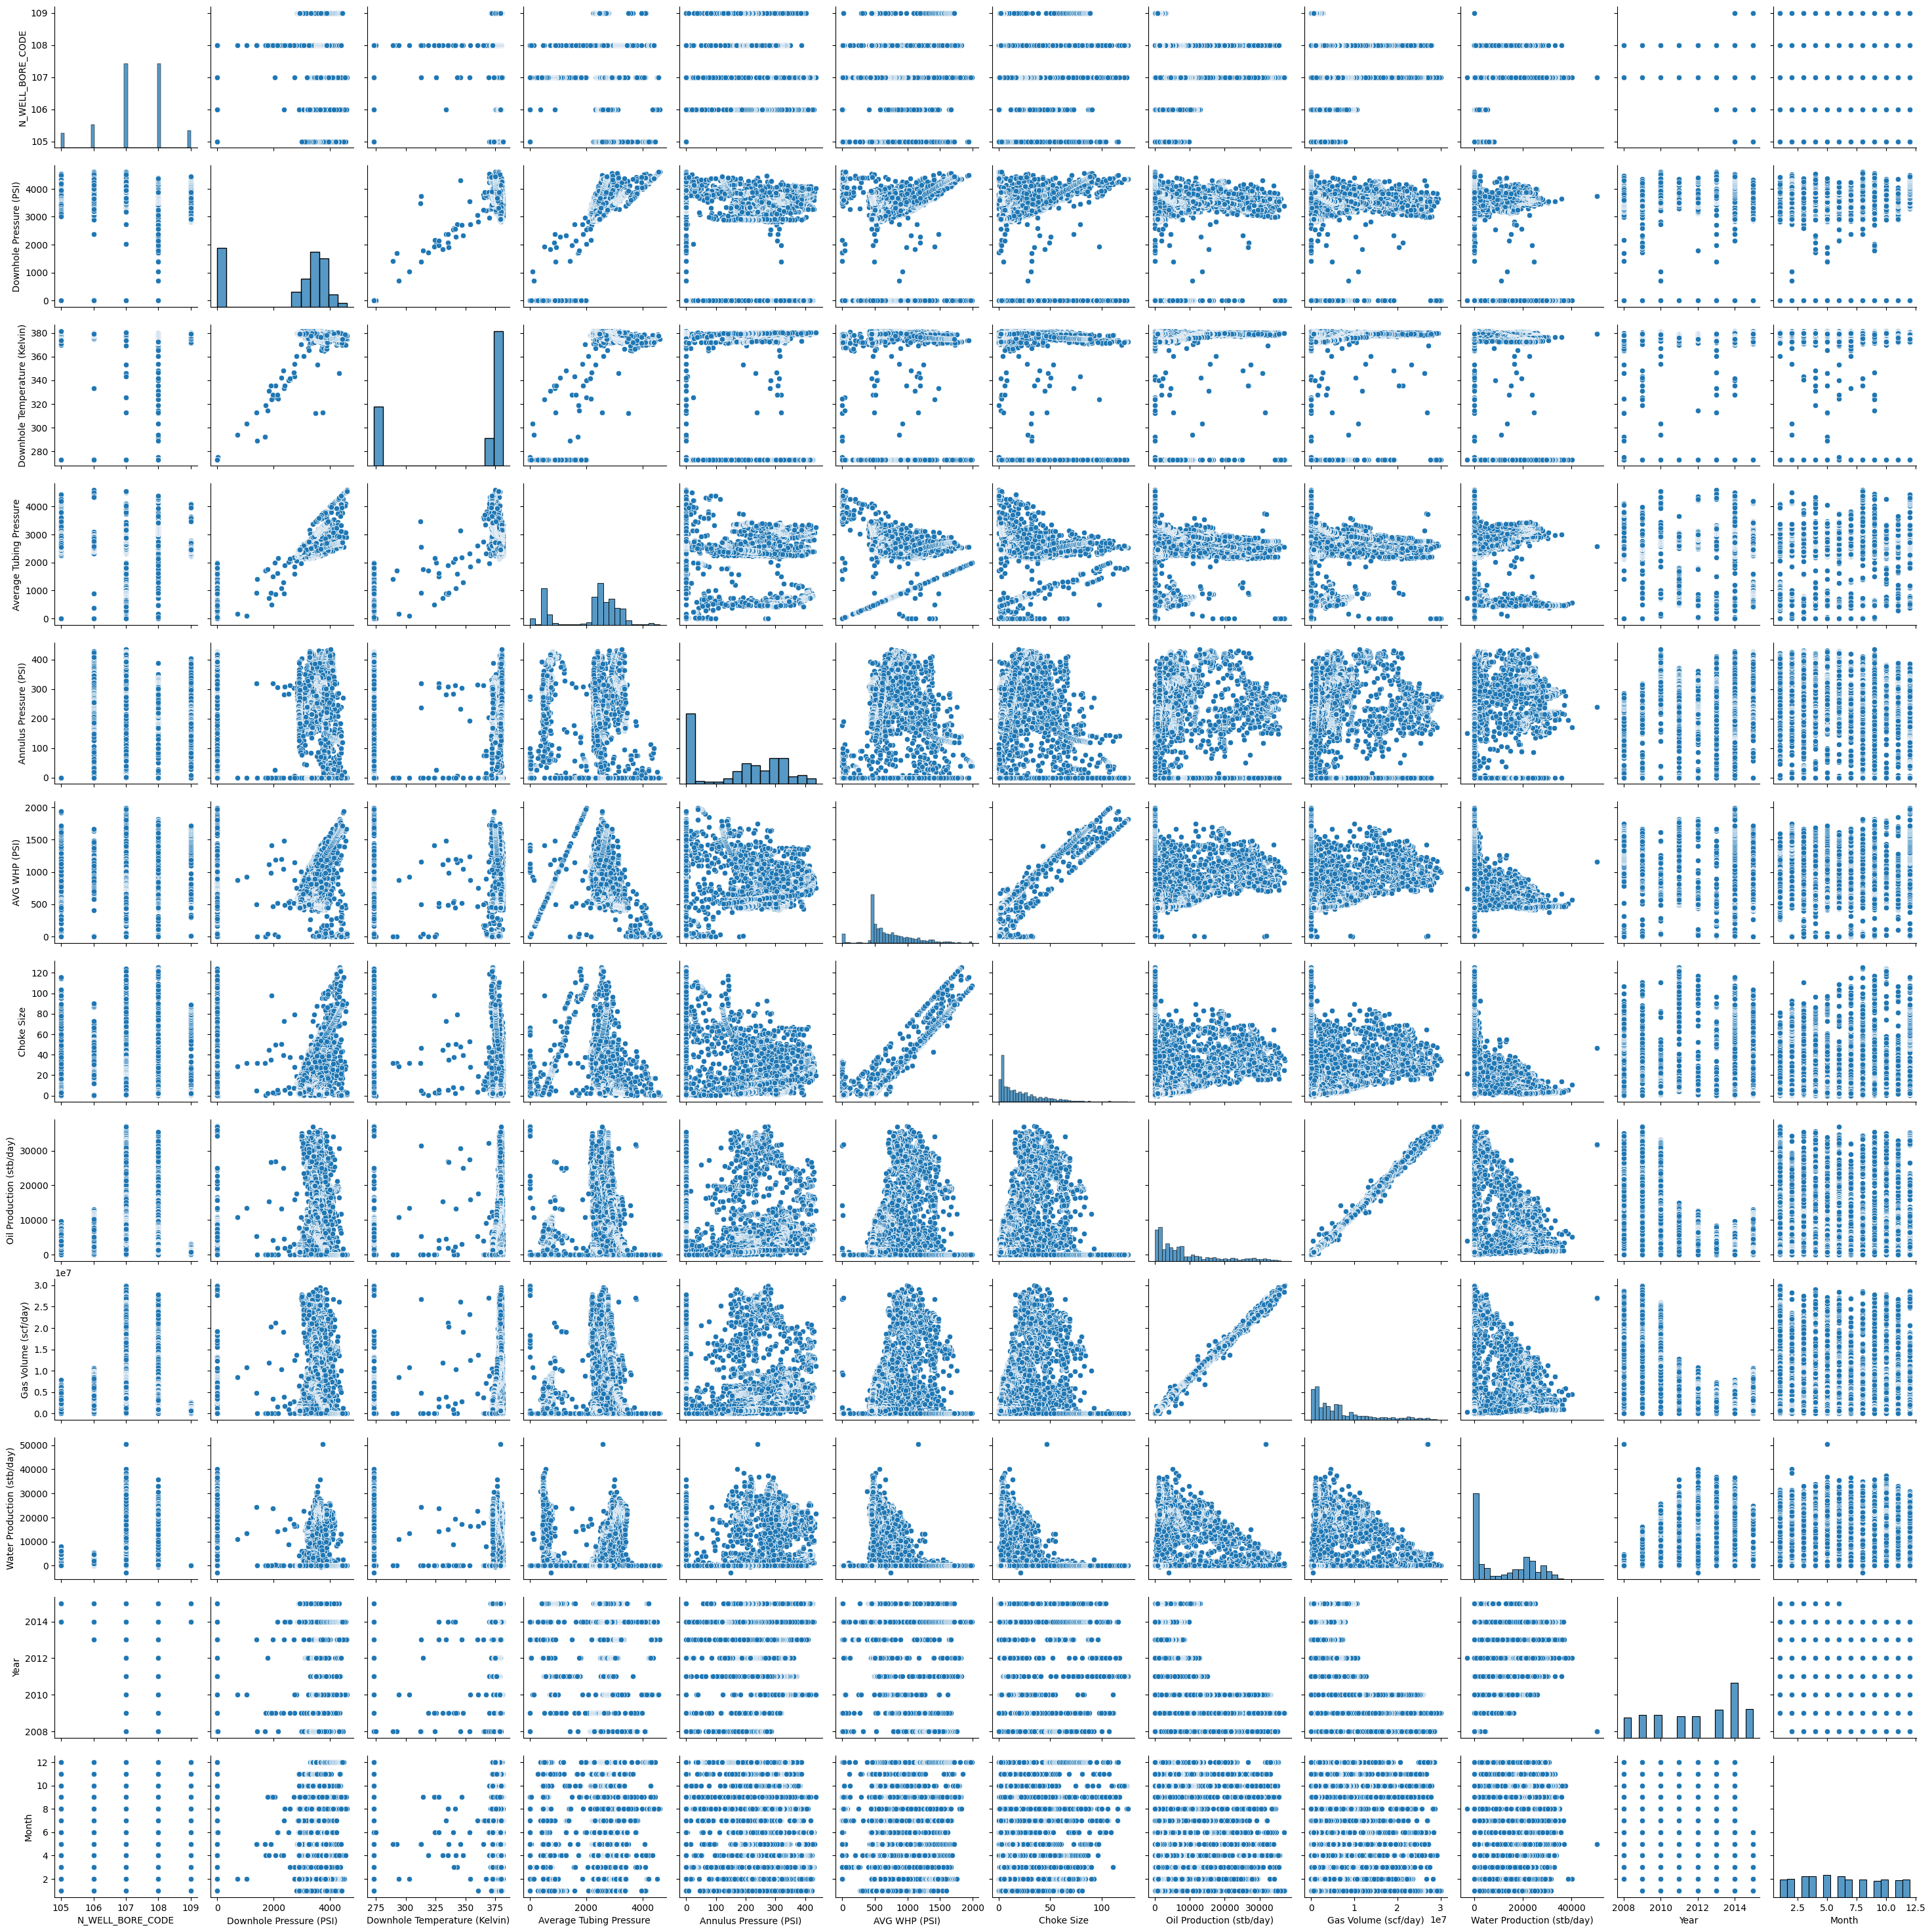

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

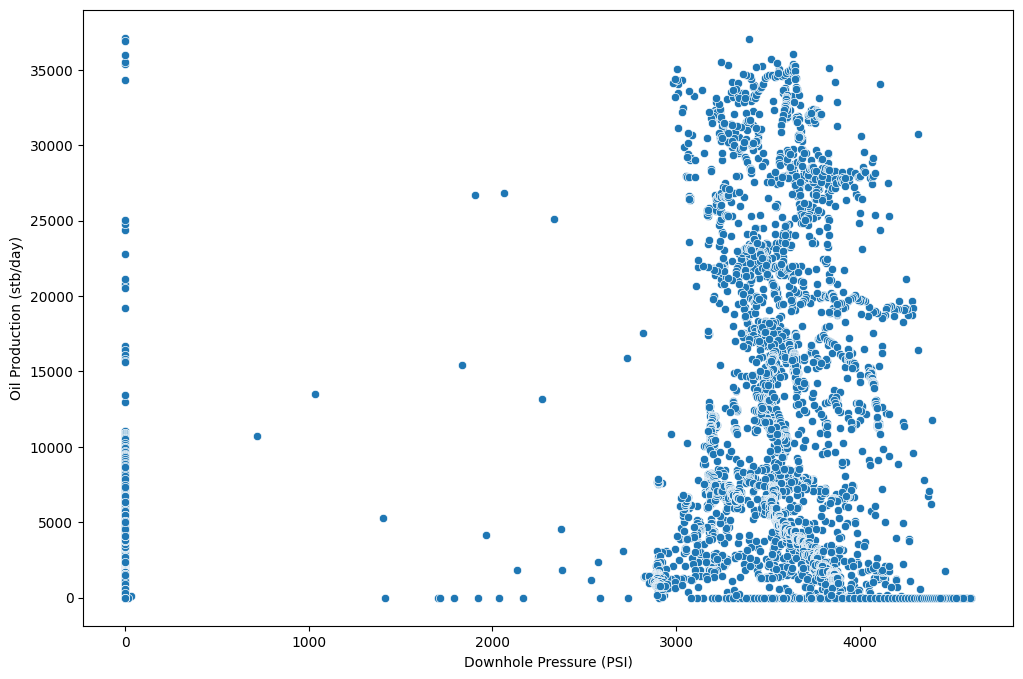

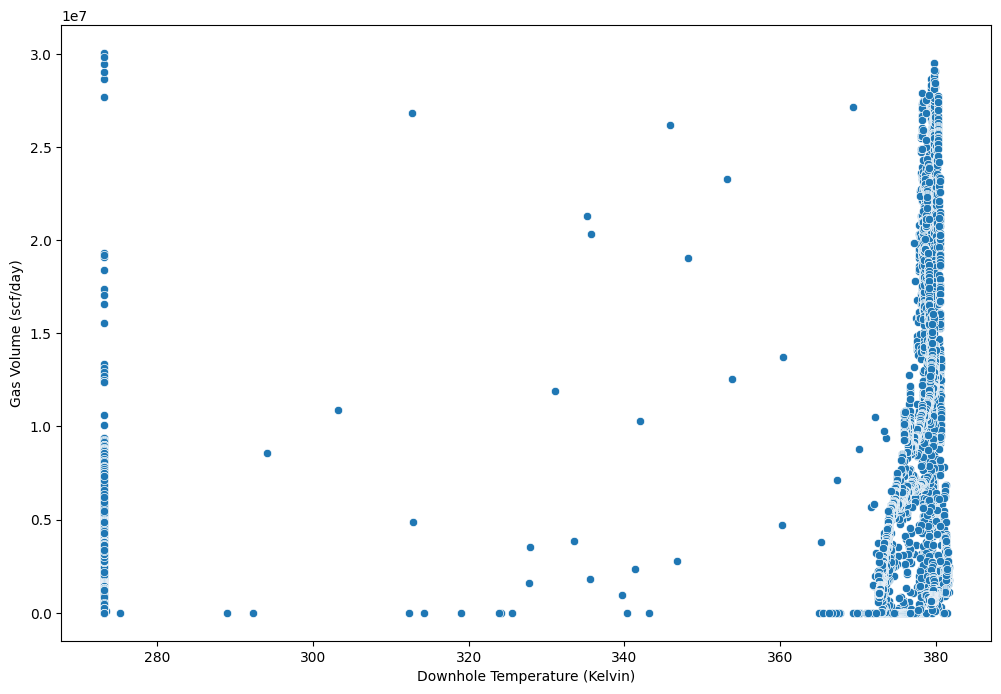

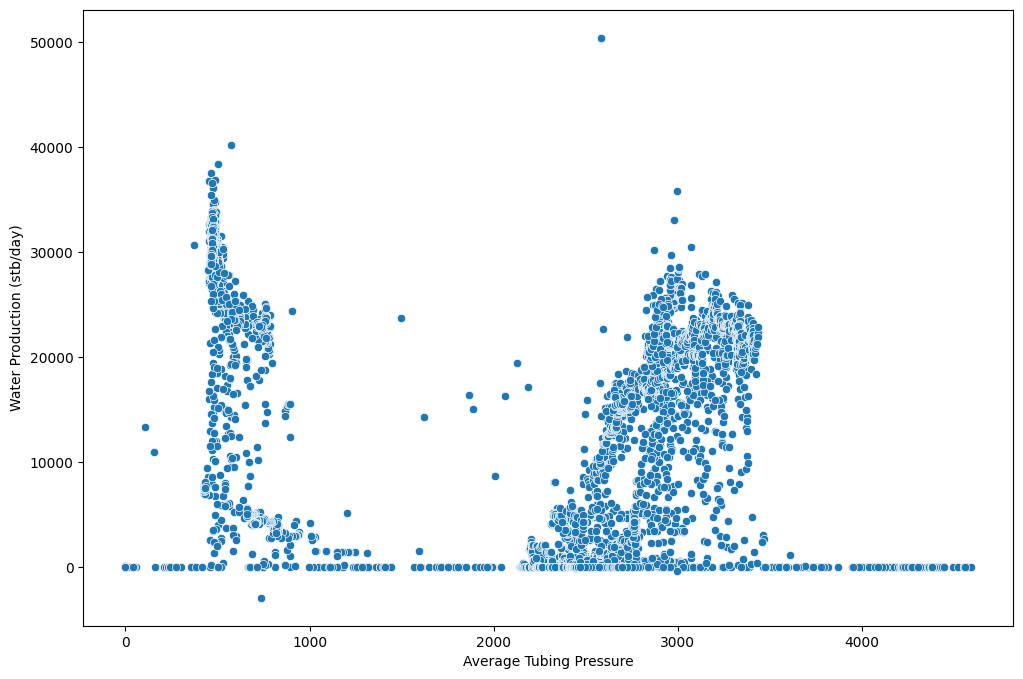

In [ ]:
# Relationships between features and target variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Downhole Pressure (PSI)', y='Oil Production (stb/day)', data=df)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Downhole Temperature (Kelvin)', y='Gas Volume (scf/day)', data=df)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average Tubing Pressure', y='Water Production (stb/day)', data=df)
plt.show()

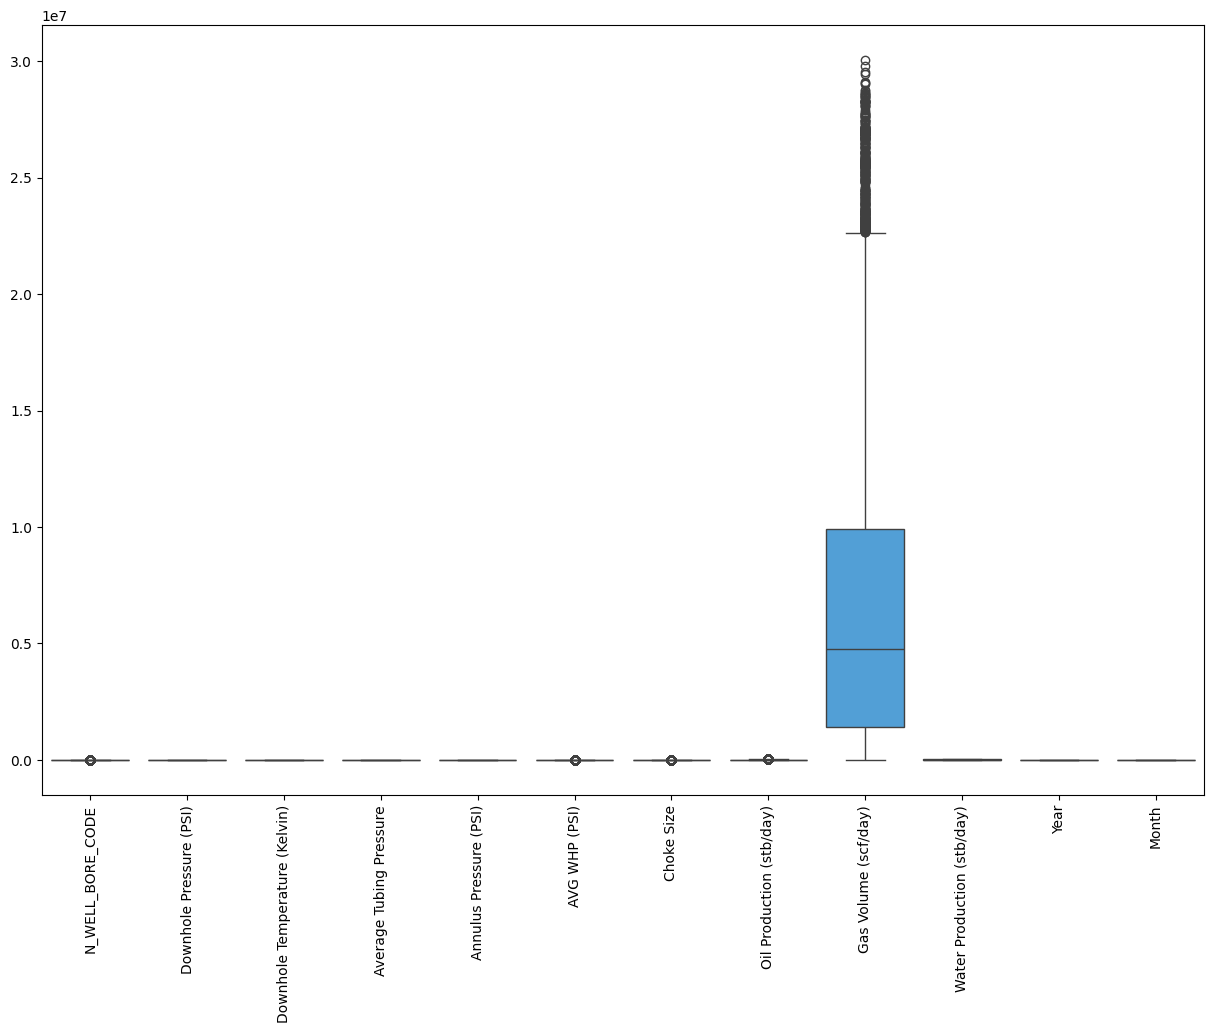

In [ ]:
# # Box plots for numerical features to detect outliers
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df)
# plt.xticks(rotation=90)
# plt.show()